# **We randomly selected 9000 from previous_application.csv**

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [2]:
# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [4]:
#pip install --upgrade scikit-learn

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Imblearn installation

In [6]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# Anaconda prompt
#!pip install -U imbalanced-learn

#conda install -c conda-forge imbalanced-learn

# Restart the kernel after successful installation of the library

# Read the dataset

In [7]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data1=pd.read_csv('/content/drive/MyDrive/previous_application.csv')

In [9]:
# copying data to another varaible to avoid any changes to original data
previous_app = data1.copy()


In [10]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
previous_app.shape

(1670214, 37)

In [12]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(previous_app.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [13]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# CODE_REJECT_REASON -    Why was the previous application rejected
previous_app['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

In [15]:
# NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application
previous_app['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [16]:
data=previous_app

# MISSING VALUE

In [17]:
def missing_values_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100*df.isnull().sum() / len(df)

    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)

    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')

    return mis_val_table_ren_columns

In [18]:
# missing values check
missing_values = missing_values_table(previous_app)
missing_values.head(20)

Your selected dataframe has37columns.
There are16columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,1664263,99.6
RATE_INTEREST_PRIMARY,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_LAST_DUE,673065,40.3
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3


In [19]:
# Number of each type of column
previous_app.dtypes.value_counts()

object     16
float64    15
int64       6
Name: count, dtype: int64

In [20]:
previous_app.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [21]:
previous_app['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

# Encoding Categorical Variables

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436

In [22]:
# Label Encode categorical variables
Status = {"Approved": 0, "Canceled": 1,"Refused": 1,"Unused offer": 1}
previous_app["NAME_CONTRACT_STATUS"] = previous_app["NAME_CONTRACT_STATUS"].map(Status)

In [23]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,0,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,0,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,1,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in previous_app:
    if previous_app[col].dtype == 'object':

        if len(list(previous_app[col].unique())) <= 2:
            le.fit(previous_app[col])
        # Transform both training and testing data
            previous_app[col] = le.transform(previous_app[col])


            le_count +=1

print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [25]:
previous_app = pd.get_dummies(previous_app)


print('Training Feature shape: ', previous_app.shape)



Training Feature shape:  (1670214, 160)


In [26]:
train_labels =previous_app['NAME_CONTRACT_STATUS']



previous_app['NAME_CONTRACT_STATUS'] =train_labels

print('Training Feature shape: ', previous_app.shape)


Training Feature shape:  (1670214, 160)


In [27]:
correlations = previous_app.corr()['NAME_CONTRACT_STATUS'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 NAME_CLIENT_TYPE_XNA                                   0.022704
CHANNEL_TYPE_Channel of corporate sales                0.023808
WEEKDAY_APPR_PROCESS_START_TUESDAY                     0.024323
CODE_REJECT_REASON_SYSTEM                              0.026513
WEEKDAY_APPR_PROCESS_START_MONDAY                      0.026843
NAME_CASH_LOAN_PURPOSE_Buying a used car               0.027079
CHANNEL_TYPE_AP+ (Cash loan)                           0.028400
NAME_CASH_LOAN_PURPOSE_Urgent needs                    0.028723
NAME_CASH_LOAN_PURPOSE_Building a house or an annex    0.030653
NAME_CASH_LOAN_PURPOSE_Payments on other loans         0.032487
PRODUCT_COMBINATION_Cash Street: middle                0.033872
NAME_CASH_LOAN_PURPOSE_Other                           0.038624
SK_ID_PREV                                             0.046699
CODE_REJECT_REASON_VERIF                               0.058920
NAME_CASH_LOAN_PURPOSE_Repairs                         0.063297
CODE_REJECT

# From reviewing the correlations above we selected the independent variables below

In [28]:
loan=previous_app[['SK_ID_CURR','CODE_REJECT_REASON_XAP','NAME_PORTFOLIO_POS','NAME_CONTRACT_TYPE_Consumer loans','CODE_REJECT_REASON_HC','CODE_REJECT_REASON_SYSTEM','NAME_PORTFOLIO_POS','NAME_PORTFOLIO_XNA','NAME_CONTRACT_STATUS']]

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  bool 
 2   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  bool 
 4   CODE_REJECT_REASON_HC              1670214 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  bool 
 6   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  bool 
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 36.6 MB


In [30]:
loan["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
0    1036781
1     633433
Name: count, dtype: int64

In [31]:
loan.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
0,271877,True,True,True,False,False,True,False,0
1,108129,True,False,False,False,False,False,False,0
2,122040,True,False,False,False,False,False,False,0
3,176158,True,False,False,False,False,False,False,0
4,202054,False,False,False,True,False,False,False,1


# **Heatmap of Selected Variables from above**

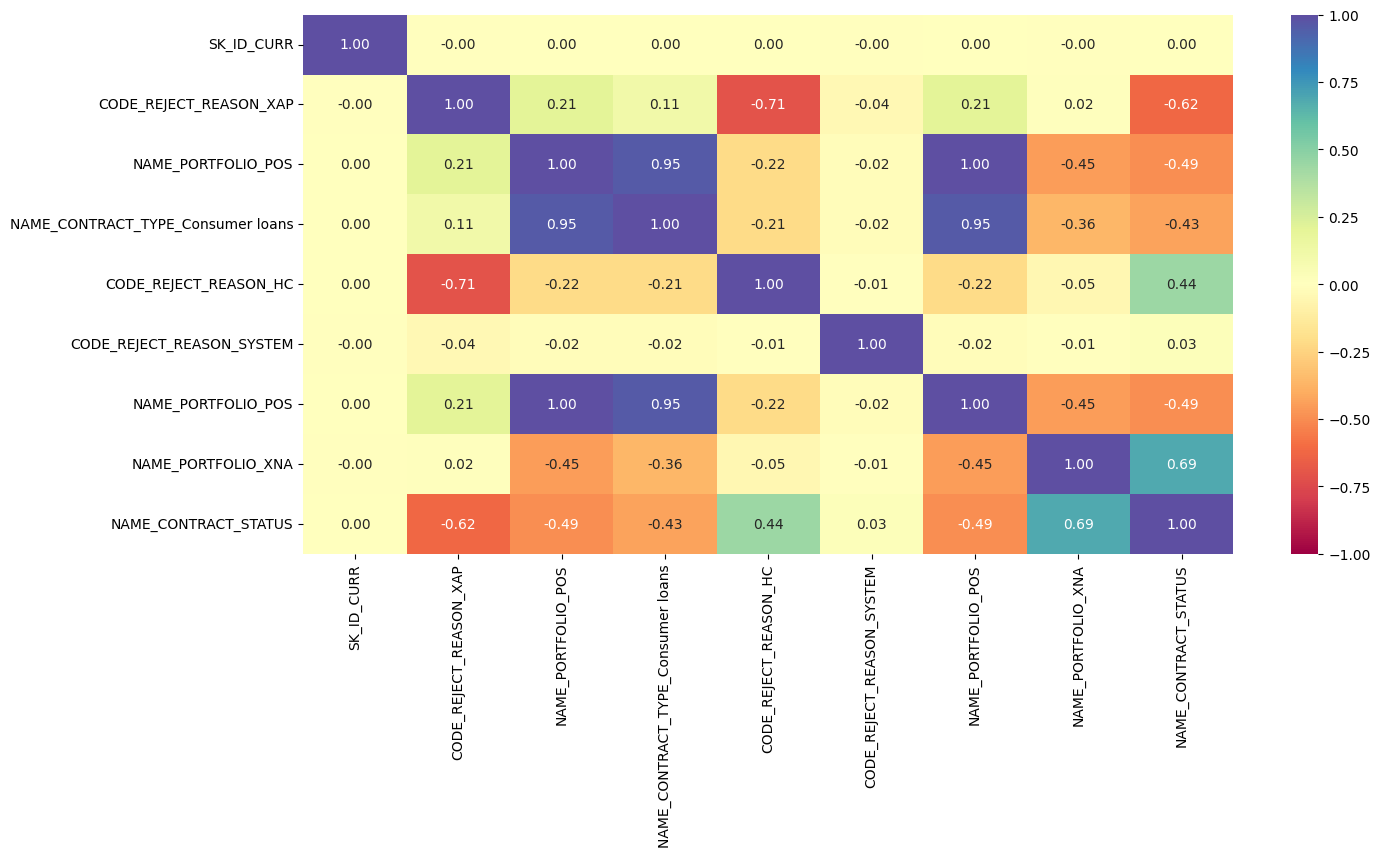

In [32]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Check for missing values on Selected Variables/Columns

In [33]:
loan.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
NAME_PORTFOLIO_POS                   0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# FINAL SEVEN

From above the Final 7 Variables to be focused on will be:

These 7 were selected because based on research of the domain, strong correlation to Independent Variable and minimal missing values which will require substantial imputation of values.

# Model Building Approach - Gaussian Naive Bayes Model

1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune/Oversample/Undersample the model if required.

In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  bool 
 2   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  bool 
 4   CODE_REJECT_REASON_HC              1670214 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  bool 
 6   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  bool 
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 36.6 MB


In [35]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

338857

# Check for duplicates on SK_ID_CURR

In [36]:
df_train_no_duplicates2 = loan.drop_duplicates(subset=['SK_ID_CURR'])

In [37]:
df_train_no_duplicates2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338857 entries, 0 to 1670060
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   SK_ID_CURR                         338857 non-null  int64
 1   CODE_REJECT_REASON_XAP             338857 non-null  bool 
 2   NAME_PORTFOLIO_POS                 338857 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  338857 non-null  bool 
 4   CODE_REJECT_REASON_HC              338857 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          338857 non-null  bool 
 6   NAME_PORTFOLIO_POS                 338857 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 338857 non-null  bool 
 8   NAME_CONTRACT_STATUS               338857 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 10.0 MB


In [38]:
df_train_no_duplicates2.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
NAME_PORTFOLIO_POS                   0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# **TAKE A RANDOM SAMPLE OF 9000 - From the previous_application.csv dataset which has been processed so far**

In [39]:
loan_random_sel=df_train_no_duplicates2.sample(n=9000, random_state=1)

In [40]:
loan_random_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 737318 to 533956
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   SK_ID_CURR                         9000 non-null   int64
 1   CODE_REJECT_REASON_XAP             9000 non-null   bool 
 2   NAME_PORTFOLIO_POS                 9000 non-null   bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  9000 non-null   bool 
 4   CODE_REJECT_REASON_HC              9000 non-null   bool 
 5   CODE_REJECT_REASON_SYSTEM          9000 non-null   bool 
 6   NAME_PORTFOLIO_POS                 9000 non-null   bool 
 7   NAME_PORTFOLIO_XNA                 9000 non-null   bool 
 8   NAME_CONTRACT_STATUS               9000 non-null   int64
dtypes: bool(7), int64(2)
memory usage: 272.5 KB


Split Data

In [41]:
# separating the independent and dependent variables

X = loan_random_sel.drop(["NAME_CONTRACT_STATUS"], axis=1)
y = loan_random_sel["NAME_CONTRACT_STATUS"]

In [42]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
737318,248439,True,True,True,False,False,True,False
382029,455947,True,False,False,False,False,False,False
65164,130748,True,False,False,False,False,False,False
103459,411314,True,True,True,False,False,True,False
1424460,251033,True,True,True,False,False,True,False


# Splitting the data into X and y

In [43]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(4500, 8) (2700, 8) (1800, 8)


In [44]:
X_train.head()



,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
295716,347585,True,True,True,False,False,True,False
535625,274555,True,True,True,False,False,True,False
76371,375069,True,False,False,False,False,False,True
106437,330226,True,True,True,False,False,True,False
125866,216680,True,False,False,False,False,False,True


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 295716 to 190809
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   SK_ID_CURR                         4500 non-null   int64
 1   CODE_REJECT_REASON_XAP             4500 non-null   bool 
 2   NAME_PORTFOLIO_POS                 4500 non-null   bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  4500 non-null   bool 
 4   CODE_REJECT_REASON_HC              4500 non-null   bool 
 5   CODE_REJECT_REASON_SYSTEM          4500 non-null   bool 
 6   NAME_PORTFOLIO_POS                 4500 non-null   bool 
 7   NAME_PORTFOLIO_XNA                 4500 non-null   bool 
dtypes: bool(7), int64(1)
memory usage: 101.1 KB


In [46]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
NAME_CONTRACT_STATUS
0    0.748111
1    0.251889
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
NAME_CONTRACT_STATUS
0    0.748
1    0.252
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
NAME_CONTRACT_STATUS
0    0.748148
1    0.251852
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
NAME_CONTRACT_STATUS
0    0.748333
1    0.251667
Name: proportion, dtype: float64
********************************************************************************


In [47]:
X_train.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
295716,347585,True,True,True,False,False,True,False
535625,274555,True,True,True,False,False,True,False
76371,375069,True,False,False,False,False,False,True
106437,330226,True,True,True,False,False,True,False
125866,216680,True,False,False,False,False,False,True


# **Build a Gaussian Naive Bayes Model**

In [48]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
# Predict class labels for X_train
y_pred = gnb.predict(X_train)

In [50]:
# Predict class probabilities for X_train
y_pred_prob = gnb.predict_proba(X_train)



In [51]:
# Create a dataframe with predicted class labels and probabilities
result_df = pd.DataFrame(y_pred_prob, columns=gnb.classes_)
result_df['target'] = y_pred


In [52]:

# Print the resulting dataframe
print(result_df)


             0         1  target
0     0.766645  0.233355       0
1     0.772846  0.227154       0
2     0.721848  0.278152       0
3     0.767890  0.232110       0
4     0.738125  0.261875       0
...        ...       ...     ...
4495  0.735102  0.264898       0
4496  0.764280  0.235720       0
4497  0.779176  0.220824       0
4498  0.783961  0.216039       0
4499  0.759172  0.240828       0

[4500 rows x 3 columns]


In [53]:
# Predict class labels and probabilities for training data
y_pred = gnb.predict(X_train)
y_probs = gnb.predict_proba(X_train)

# Create a dataframe with original X_train column names and "target" column
result_df = pd.DataFrame(X_train, columns=X_train.columns)
result_df['target'] = y_pred

# Add columns for class probabilities
for i, class_name in enumerate(gnb.classes_):
    result_df[f'prob_{class_name}'] = y_probs[:, i]

# Display the resulting dataframe
print(result_df)


         SK_ID_CURR  CODE_REJECT_REASON_XAP  NAME_PORTFOLIO_POS  \
295716       347585                    True                True   
535625       274555                    True                True   
76371        375069                    True               False   
106437       330226                    True                True   
125866       216680                    True               False   
...             ...                     ...                 ...   
1428782      238566                    True               False   
1618582      388786                    True                True   
656082       219227                    True                True   
255862       183521                    True                True   
190809       152562                    True               False   

         NAME_CONTRACT_TYPE_Consumer loans  CODE_REJECT_REASON_HC  \
295716                                True                  False   
535625                                True               

In [54]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 295716 to 190809
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         4500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             4500 non-null   bool   
 2   NAME_PORTFOLIO_POS                 4500 non-null   bool   
 3   NAME_CONTRACT_TYPE_Consumer loans  4500 non-null   bool   
 4   CODE_REJECT_REASON_HC              4500 non-null   bool   
 5   CODE_REJECT_REASON_SYSTEM          4500 non-null   bool   
 6   NAME_PORTFOLIO_POS                 4500 non-null   bool   
 7   NAME_PORTFOLIO_XNA                 4500 non-null   bool   
 8   target                             4500 non-null   int64  
 9   prob_0                             4500 non-null   float64
 10  prob_1                             4500 non-null   float64
dtypes: bool(7), float64(2), int64(2)
memory usage: 206.5 K

In [55]:
result_df1=result_df[['SK_ID_CURR','target','prob_0','prob_1']].copy()

In [56]:
result_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 295716 to 190809
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  4500 non-null   int64  
 1   target      4500 non-null   int64  
 2   prob_0      4500 non-null   float64
 3   prob_1      4500 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 175.8 KB


In [57]:
#Check df1
result_df1['target'].value_counts()

target
0    4500
Name: count, dtype: int64

# BRING in application_train csv

In [58]:
data2=pd.read_csv('/content/drive/MyDrive/application_train.csv')

In [59]:
app_train1 = data2.copy()

In [60]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## **MERGE the application_train dataset with the dataset created using the Gausian Naive Bayes Model**

In [61]:
app_train_merge=pd.merge(result_df1, app_train1, on = "SK_ID_CURR", how = "left")

In [62]:
app_train_merge.shape

(4500, 125)

In [63]:
app_train_merge.head()

,SK_ID_CURR,target,prob_0,prob_1,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,347585,0,0.766645,0.233355,0.0,Cash loans,F,N,N,1.0,112500.0,76410.0,7573.5,67500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,0.031329,-16432.0,-9539.0,-6247.0,-3002.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,SATURDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Industry: type 5,NaN,0.415392,0.723837,0.0928,0.0735,0.9781,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0552,NaN,0.0469,NaN,NaN,0.0945,0.0762,0.9782,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0565,NaN,0.0488,NaN,NaN,0.0937,0.0735,0.9781,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0562,NaN,0.0477,NaN,NaN,NaN,block of flats,0.0603,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,274555,0,0.772846,0.227154,0.0,Cash loans,F,N,Y,0.0,103500.0,332473.5,18562.5,274500.0,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,0.025164,-23244.0,365243.0,-14327.0,-3998.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2.0,2.0,2.0,SATURDAY,8.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,0.159679,NaN,0.0165,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0148,NaN,0.0,0.0168,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0154,NaN,0.0,0.0167,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0151,NaN,0.0,NaN,block of flats,0.0116,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,375069,0,0.721848,0.278152,0.0,Cash loans,F,N,N,0.0,147150.0,531706.5,17572.5,459000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,-22692.0,365243.0,-9413.0,-4630.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,2.0,2.0,SUNDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,0.056037,0.434733,NaN,NaN,N

In [64]:
app_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 4.3+ MB


In [65]:
loan_random_sel.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
737318,248439,True,True,True,False,False,True,False,0
382029,455947,True,False,False,False,False,False,False,0
65164,130748,True,False,False,False,False,False,False,0
103459,411314,True,True,True,False,False,True,False,0
1424460,251033,True,True,True,False,False,True,False,0


In [66]:
result_df1.head()

,SK_ID_CURR,target,prob_0,prob_1
295716,347585,0,0.766645,0.233355
535625,274555,0,0.772846,0.227154
76371,375069,0,0.721848,0.278152
106437,330226,0,0.767890,0.232110
125866,216680,0,0.738125,0.261875


In [67]:
loan_random_sel.shape

(9000, 9)

In [68]:
result_df1.shape

(4500, 4)

In [69]:
app_train_merge.shape

(4500, 125)

In [70]:
app_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 4.3+ MB


**Create a copy of app_train_merge and name it loanmodel**

In [71]:
loanmodel=app_train_merge.copy()

In [72]:
loanmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 4.3+ MB


# **KEEP THE COLUMNS FROM GAUSIAN MODEL AND COLUMNS USED IN PREVIOUS RANDOM FOREST MODEL**

In [73]:
loanmodel.head()

,SK_ID_CURR,target,prob_0,prob_1,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,347585,0,0.766645,0.233355,0.0,Cash loans,F,N,N,1.0,112500.0,76410.0,7573.5,67500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,0.031329,-16432.0,-9539.0,-6247.0,-3002.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,SATURDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Industry: type 5,NaN,0.415392,0.723837,0.0928,0.0735,0.9781,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0552,NaN,0.0469,NaN,NaN,0.0945,0.0762,0.9782,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0565,NaN,0.0488,NaN,NaN,0.0937,0.0735,0.9781,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0562,NaN,0.0477,NaN,NaN,NaN,block of flats,0.0603,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,274555,0,0.772846,0.227154,0.0,Cash loans,F,N,Y,0.0,103500.0,332473.5,18562.5,274500.0,"Spouse, partner",Pensioner,Secondary / secondary special,Married,House / apartment,0.025164,-23244.0,365243.0,-14327.0,-3998.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2.0,2.0,2.0,SATURDAY,8.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,0.159679,NaN,0.0165,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0148,NaN,0.0,0.0168,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0154,NaN,0.0,0.0167,NaN,0.9742,NaN,NaN,0.0,0.0690,0.0417,NaN,NaN,NaN,0.0151,NaN,0.0,NaN,block of flats,0.0116,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,375069,0,0.721848,0.278152,0.0,Cash loans,F,N,N,0.0,147150.0,531706.5,17572.5,459000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,-22692.0,365243.0,-9413.0,-4630.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,2.0,2.0,SUNDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,XNA,NaN,0.056037,0.434733,NaN,NaN,N

In [74]:
loanmodel['TARGET'].value_counts()

TARGET
0.0    3574
1.0     323
Name: count, dtype: int64

# SPLITTING

Before modelling we drop the SK_ID_CURR

In [75]:
loanmodel=loanmodel.drop(["SK_ID_CURR"], axis=1)

loanmodel.head(20)

In [76]:
loanmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 124 entries, target to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(1), object(16)
memory usage: 4.3+ MB


In [77]:
nan_columns = loanmodel.isna().any()
columns_with_nan = nan_columns[nan_columns].index.tolist()
print(columns_with_nan)


['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', '

# **Columns that contain NaNs**

In [78]:
# Counting the NaNs in each column
nans_per_column = loanmodel.isna().sum()

# Filtering out the columns with more than 0 NaNs
columns_with_nans = nans_per_column[nans_per_column > 0]

print(columns_with_nans)


TARGET                           603
NAME_CONTRACT_TYPE               603
CODE_GENDER                      603
FLAG_OWN_CAR                     603
FLAG_OWN_REALTY                  603
CNT_CHILDREN                     603
AMT_INCOME_TOTAL                 603
AMT_CREDIT                       603
AMT_ANNUITY                      604
AMT_GOODS_PRICE                  605
NAME_TYPE_SUITE                  614
NAME_INCOME_TYPE                 603
NAME_EDUCATION_TYPE              603
NAME_FAMILY_STATUS               603
NAME_HOUSING_TYPE                603
REGION_POPULATION_RELATIVE       603
DAYS_BIRTH                       603
DAYS_EMPLOYED                    603
DAYS_REGISTRATION                603
DAYS_ID_PUBLISH                  603
OWN_CAR_AGE                     3217
FLAG_MOBIL                       603
FLAG_EMP_PHONE                   603
FLAG_WORK_PHONE                  603
FLAG_CONT_MOBILE                 603
FLAG_PHONE                       603
FLAG_EMAIL                       603
O

# **Columns that do not contain Nans**

In [79]:
# Counting the NaNs in each column
nans_per_column = loanmodel.isna().sum()

# Filtering out the columns with 0 NaNs, meaning no missing values
columns_without_nans = nans_per_column[nans_per_column == 0].index.tolist()

print(columns_without_nans)


['target', 'prob_0', 'prob_1']


# **We will use columns used in previous Random Forest Model and add the columns from Gausian Model**

In [80]:
loanmodel2=loanmodel[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL','target','prob_0','prob_1']]

In [81]:
loanmodel2.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,AMT_CREDIT,AMT_INCOME_TOTAL,target,prob_0,prob_1
0,0.0,0.415392,0.723837,-16432.0,-3002.0,-6247.0,7573.5,0.0,-9539.0,76410.0,112500.0,0,0.766645,0.233355
1,0.0,0.159679,NaN,-23244.0,-3998.0,-14327.0,18562.5,0.0,365243.0,332473.5,103500.0,0,0.772846,0.227154
2,0.0,0.056037,0.434733,-22692.0,-4630.0,-9413.0,17572.5,-1088.0,365243.0,531706.5,147150.0,0,0.721848,0.278152
3,1.0,0.561621,0.204423,-23327.0,-4261.0,-11971.0,20146.5,0.0,-4768.0,684657.0,157500.0,0,0.767890,0.232110
4,0.0,0.629945,0.577969,-19822.0,-3355.0,-6043.0,31653.0,-2763.0,365243.0,1078200.0,112500.0,0,0.738125,0.261875


In [82]:
loanmodel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  3897 non-null   float64
 1   EXT_SOURCE_2            3892 non-null   float64
 2   EXT_SOURCE_3            3119 non-null   float64
 3   DAYS_BIRTH              3897 non-null   float64
 4   DAYS_ID_PUBLISH         3897 non-null   float64
 5   DAYS_REGISTRATION       3897 non-null   float64
 6   AMT_ANNUITY             3896 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  3897 non-null   float64
 8   DAYS_EMPLOYED           3897 non-null   float64
 9   AMT_CREDIT              3897 non-null   float64
 10  AMT_INCOME_TOTAL        3897 non-null   float64
 11  target                  4500 non-null   int64  
 12  prob_0                  4500 non-null   float64
 13  prob_1                  4500 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 4

In [83]:
# Step 1 & 2: Check for NaNs and sum them up per column
missing_values_count = loanmodel2.isna().sum()

# Step 3: Display the number of missing values per column
print(missing_values_count)


TARGET                     603
EXT_SOURCE_2               608
EXT_SOURCE_3              1381
DAYS_BIRTH                 603
DAYS_ID_PUBLISH            603
DAYS_REGISTRATION          603
AMT_ANNUITY                604
DAYS_LAST_PHONE_CHANGE     603
DAYS_EMPLOYED              603
AMT_CREDIT                 603
AMT_INCOME_TOTAL           603
target                       0
prob_0                       0
prob_1                       0
dtype: int64


## **Drop rows that contain NaN values**

In [84]:
loanmodel2 = loanmodel2.dropna()


In [85]:
loanmodel2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3116 entries, 0 to 4498
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  3116 non-null   float64
 1   EXT_SOURCE_2            3116 non-null   float64
 2   EXT_SOURCE_3            3116 non-null   float64
 3   DAYS_BIRTH              3116 non-null   float64
 4   DAYS_ID_PUBLISH         3116 non-null   float64
 5   DAYS_REGISTRATION       3116 non-null   float64
 6   AMT_ANNUITY             3116 non-null   float64
 7   DAYS_LAST_PHONE_CHANGE  3116 non-null   float64
 8   DAYS_EMPLOYED           3116 non-null   float64
 9   AMT_CREDIT              3116 non-null   float64
 10  AMT_INCOME_TOTAL        3116 non-null   float64
 11  target                  3116 non-null   int64  
 12  prob_0                  3116 non-null   float64
 13  prob_1                  3116 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 365.2 

In [86]:
# separating the independent and dependent variables

X = loanmodel2.drop(["TARGET"], axis=1)
y = loanmodel2["TARGET"]

In [87]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,AMT_CREDIT,AMT_INCOME_TOTAL,target,prob_0,prob_1
0,0.415392,0.723837,-16432.0,-3002.0,-6247.0,7573.5,0.0,-9539.0,76410.0,112500.0,0,0.766645,0.233355
2,0.056037,0.434733,-22692.0,-4630.0,-9413.0,17572.5,-1088.0,365243.0,531706.5,147150.0,0,0.721848,0.278152
3,0.561621,0.204423,-23327.0,-4261.0,-11971.0,20146.5,0.0,-4768.0,684657.0,157500.0,0,0.767890,0.232110
4,0.629945,0.577969,-19822.0,-3355.0,-6043.0,31653.0,-2763.0,365243.0,1078200.0,112500.0,0,0.738125,0.261875
5,0.672086,0.506484,-20411.0,-3595.0,-10247.0,30528.0,0.0,365243.0,942300.0,202500.0,0,0.784119,0.215881


In [88]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(1558, 13) (934, 13) (624, 13)


In [89]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
TARGET
0.0    0.921694
1.0    0.078306
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
TARGET
0.0    0.921694
1.0    0.078306
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
TARGET
0.0    0.921842
1.0    0.078158
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
TARGET
0.0    0.921474
1.0    0.078526
Name: proportion, dtype: float64
********************************************************************************


## **RANDOM FOREST**

Let's first build a model with default parameters and see it's performance

In [90]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

# **Let's check model's performance**

In [91]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

print("")

# F1 score on train and validation set
print("F1 Score on train and validation set")
print(f1_score(y_train, rf.predict(X_train)))
print(f1_score(y_val, rf.predict(X_val)))
print("")

Recall on train and validation set
0.9918032786885246
0.0

Precision on train and validation set
1.0
0.0

Accuracy on train and validation set
0.9993581514762516
0.9218415417558886

F1 Score on train and validation set
0.9958847736625513
0.0



# **Hyperparameter Tuning**

Grid Search CV

Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on the specific parameter values of a model. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# **Hyperparameters available for an algorithm?**

In [92]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We can choose which ones to tune.

In [93]:
print(np.arange(0.2, 0.7, 0.1))

print(np.arange(5,10))

[0.2 0.3 0.4 0.5 0.6]
[5 6 7 8 9]


# **Let's tune Random forest using Grid Search**

In [94]:
%%time

# Choose the type of classifier.
rf1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
CPU times: user 32 s, sys: 5.43 s, total: 37.4 s
Wall time: 1min 47s


{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 0.4000000000000001,
 'max_samples': 0.6000000000000001,
 'min_impurity_decrease': 0.003,
 'min_samples_leaf': 6,
 'n_estimators': 200}

Let's check the best CV score, for the obtained parameters

In [95]:
grid_obj.best_score_

0.46799999999999997

Let's build a model with obtained best parameter

We are hard coding the hyperparameters separately so that we don't have to run the grid search again.

In [96]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.6000000000000001,
    min_samples_leaf=5,
    n_estimators=150,
    max_depth=3,
    random_state=1,
    min_impurity_decrease=0.001,
)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

Let's check the model's performance

In [97]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

print("")

# F1 score on train and validation set
print("F1 Score on train and validation set")
print(f1_score(y_train, rf.predict(X_train)))
print(f1_score(y_val, rf.predict(X_val)))
print("")

Recall on train and validation set
0.9918032786885246
0.0

Precision on train and validation set
1.0
0.0

Accuracy on train and validation set
0.9993581514762516
0.9218415417558886

F1 Score on train and validation set
0.9958847736625513
0.0



# **Randomized Search CV**

Random search is a tuning technique that attempts to compute the optimum values of hyperparameters randomly unlike grid search

# **Let's tune Random forest using Randomized Search**

In [98]:
%%time

# Choose the type of classifier.
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 670 ms, sys: 40.3 ms, total: 710 ms
Wall time: 2.11 s


{'n_estimators': 150,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.002,
 'max_samples': 0.6000000000000001,
 'max_features': 0.4000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced'}

Let's check the best CV score, for the obtained parameters

In [99]:
grid_obj.best_score_

0.45999999999999996

In [100]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
    max_depth=3,
    min_impurity_decrease=0.003,
)

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.5, min_impurity_decrease=0.003,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

**Let's check model's performance**

In [101]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf2_tuned.predict(X_train)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, rf2_tuned.predict(X_train)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, rf2_tuned.predict(X_train)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

print("")
print("F1 Score on train and validation set")
# Checking accuracy score on train and validation set
print(f1_score(y_train, rf2_tuned.predict(X_train)))
print(f1_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.5819672131147541
0.3561643835616438

Precision on train and validation set
0.25
0.18181818181818182

Accuracy on train and validation set
0.8305519897304237
0.8244111349036403

F1 Score on train and validation set
0.3497536945812808
0.24074074074074076


# **Choose a best model and predict the performance on the test set¶**

In [102]:
model1= rf1_tuned

In [103]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model1.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model1.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model1.predict(X_test)))
print("")

# Checking accuracy score on test set
print("F1 Score on test set")
print(f1_score(y_test, model1.predict(X_test)))

Recall on test set
0.42857142857142855

Precision on test set
0.17647058823529413

Accuracy on test set
0.7980769230769231

F1 Score on test set
0.25


In [104]:
model2 = rf2_tuned

In [105]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model2.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model2.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model2.predict(X_test)))

print("")

# Checking accuracy score on test set
print("F1 Score on test set")
print(f1_score(y_test, model2.predict(X_test)))

Recall on test set
0.3877551020408163

Precision on test set
0.17757009345794392

Accuracy on test set
0.8108974358974359

F1 Score on test set
0.24358974358974356
